<a href="https://colab.research.google.com/github/BBMRI-ERIC/ISO23494-PROV-demonstrator/blob/main/Part%203%20-%20Provenance%20of%20Biological%20Specimen/examples-2023/fullProvChainBiobanking.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#
# INSTALL PACKAGES
#
!pip install prov

In [6]:
import prov.model as prov
import json

from prov.dot import prov_to_dot
from IPython.display import SVG

document = prov.ProvDocument()

document.set_default_namespace('https://github.com/BBMRI-ERIC/ISO23494-PROV-demonstrator/tree/main/https://github.com/BBMRI-ERIC/ISO23494-PROV-demonstrator/tree/main/Part%203%20-%20Provenance%20of%20Biological%20Specimen/examples-2023/Biobank')
document.add_namespace('cpim', 'http://cpim.org/')
document.add_namespace('biobank', 'http://demo-biobank.org/')
document.add_namespace('cpm', 'http://part2-common-provenance-model.ISO-23494.org/')
document.add_namespace('pbm', 'http://part3-provenance-of-biological-material.ISO-23494.org/')
document.add_namespace('hospital', 'http://demo-hospital.org/')

######################Biobank_delivery20201121_5784167######################
biobank20201121_5784167 = document.bundle('biobank:Biobank_biobank20201121_5784167')
document.set_default_namespace('https://github.com/BBMRI-ERIC/ISO23494-PROV-demonstrator/tree/main/https://github.com/BBMRI-ERIC/ISO23494-PROV-demonstrator/tree/main/Part%203%20-%20Provenance%20of%20Biological%20Specimen/examples-2023/biobank_2020-11-21_5784167')

###################### Actors in Biobank ######################
biobank20201121_5784167.agent('biobank:WORKER_7275457', {prov.PROV_TYPE: 'prov:Person', 'name': "Anna Aligator"})
biobank20201121_5784167.agent('biobank:WORKER_7275987', {prov.PROV_TYPE: 'prov:Person', 'name': "Tom Turkey"})

################### Sample, delivered to researcher ######################
Sample_215784545 = biobank20201121_5784167.entity('biobank:sample_215784545', ((prov.PROV_TYPE, "pbm:Sample"),('cpim:externalId', "demo-bb-study2023-08:sample007")))
biobank20201121_5784167.activity('biobank:act_57585', '2020-11-23T10:22:01.024000+01:00','2020-11-21T08:15:00.024000+01:00', {prov.PROV_TYPE: "pbm:Distribution"})
biobank20201121_5784167.wasAssociatedWith('biobank:act_57585', 'biobank:WORKER_7275457',None,None, {prov.PROV_ROLE: "sort in"})
biobank20201121_5784167.used('biobank:sample_215784545','biobank:act_57585' )

################### Same sample with the barcode used in the Biobank  ######################
Sample_215784544 = biobank20201121_5784167.entity('biobank:sample_215784544', ((prov.PROV_TYPE, "pbm:Sample"),('cpim:externalId', "2007-PAT-34441208197199889-7780-BLK-LY")))
biobank20201121_5784167.wasDerivedFrom('biobank:sample_215784545' ,'biobank:sample_215784544')

#Relabeling
biobank20201121_5784167.activity('biobank:act_57584', '2020-11-22T08:15:01.024000+01:00', None, {prov.PROV_TYPE: "pbm:Processing"})
biobank20201121_5784167.wasAssociatedWith('biobank:act_57584', 'biobank:WORKER_7275457',None,None, {prov.PROV_ROLE: "sort in"})
biobank20201121_5784167.used('biobank:sample_215784544','biobank:act_57584' )

#Receiving from Biobank
Sample_215784543 = biobank20201121_5784167.entity('biobank:sample_215784543', ((prov.PROV_TYPE, "pbm:Sample"),('cpim:externalId', "2007-PAT-34441208197199889-7780-BLK-LY")))
biobank20201121_5784167.wasDerivedFrom('biobank:sample_215784544' ,'biobank:sample_215784543')
biobank20201121_5784167.activity('biobank:act_15754', '2020-11-21T12:00:01.024000+01:00',None, {prov.PROV_TYPE: "pbm:Receiving"})
biobank20201121_5784167.wasAssociatedWith('biobank:act_15754', 'biobank:WORKER_7275987',None,None, {prov.PROV_ROLE: "pick"})
biobank20201121_5784167.used('biobank:sample_2157845433','biobank:act_15754' )

#Storing in Biobank
Sample_215784542 = biobank20201121_5784167.entity('biobank:sample_215784542', ((prov.PROV_TYPE, "pbm:Sample"),('cpim:externalId', "2007-PAT-34441208197199889-7780-BLK-LY")))
biobank20201121_5784167.wasDerivedFrom('biobank:sample_215784543' ,'biobank:sample_215784542')
biobank20201121_5784167.activity('biobank:act_57582', '1988-05-04T08:00:00.024000+01:00','2020-11-21T12:00:01.024000+01:00', {prov.PROV_TYPE: "pbm:Storing"})
biobank20201121_5784167.wasAssociatedWith('biobank:act_57584', 'biobank:WORKER_7275457',None,None, {prov.PROV_ROLE: "sort in"})
biobank20201121_5784167.used('biobank:SLIDE_215784542','biobank:act_57584' )


document.get_provn() # =>

provn = document.serialize(format='provn')
print(provn)


document
  default <https://github.com/BBMRI-ERIC/ISO23494-PROV-demonstrator/tree/main/https://github.com/BBMRI-ERIC/ISO23494-PROV-demonstrator/tree/main/Part%203%20-%20Provenance%20of%20Biological%20Specimen/examples-2023/biobank_2020-11-21_5784167>
  prefix cpim <http://cpim.org/>
  prefix biobank <http://demo-biobank.org/>
  prefix cpm <http://part2-common-provenance-model.ISO-23494.org/>
  prefix pbm <http://part3-provenance-of-biological-material.ISO-23494.org/>
  prefix hospital <http://demo-hospital.org/>
  
  bundle biobank:Biobank_biobank20201121_5784167
    agent(biobank:WORKER_7275457, [prov:type="prov:Person", name="Anna Aligator"])
    agent(biobank:WORKER_7275987, [prov:type="prov:Person", name="Tom Turkey"])
    entity(biobank:sample_215784545, [prov:type="pbm:Sample", cpim:externalId="demo-bb-study2023-08:sample007"])
    activity(biobank:act_57585, 2020-11-23T10:22:01.024000+01:00, 2020-11-21T08:15:00.024000+01:00, [prov:type="pbm:Distribution"])
    wasAssociatedWith(

In [ ]:
#Print in Json Style
jsonstring  = json.loads (document.serialize())
print(json.dumps(jsonstring, indent=4))


{
    "prefix": {
        "cpim": "http://cpim.org/",
        "biobank": "http://demo-biobank.org/",
        "hospital": "http://demo-hospital.org/",
        "default": "https://github.com/BBMRI-ERIC/ISO23494-PROV-demonstrator/tree/main/https://github.com/BBMRI-ERIC/ISO23494-PROV-demonstrator/tree/main/Part%203%20-%20Provenance%20of%20Biological%20Specimen/examples-2023/biobank_2020-11-21_5784167"
    },
    "bundle": {
        "biobank:Biobank_biobank20201121_5784167": {
            "agent": {
                "biobank:WORKER_7275457": {
                    "prov:type": "prov:Person",
                    "name": "Anna Aligator"
                },
                "biobank:WORKER_7275987": {
                    "prov:type": "prov:Person",
                    "name": "Tom Turkey"
                }
            },
            "entity": {
                "biobank:sample_215784545": {
                    "prov:type": "Sample",
                    "cpim:externalId": "demo-bb-study2023-08:sampl

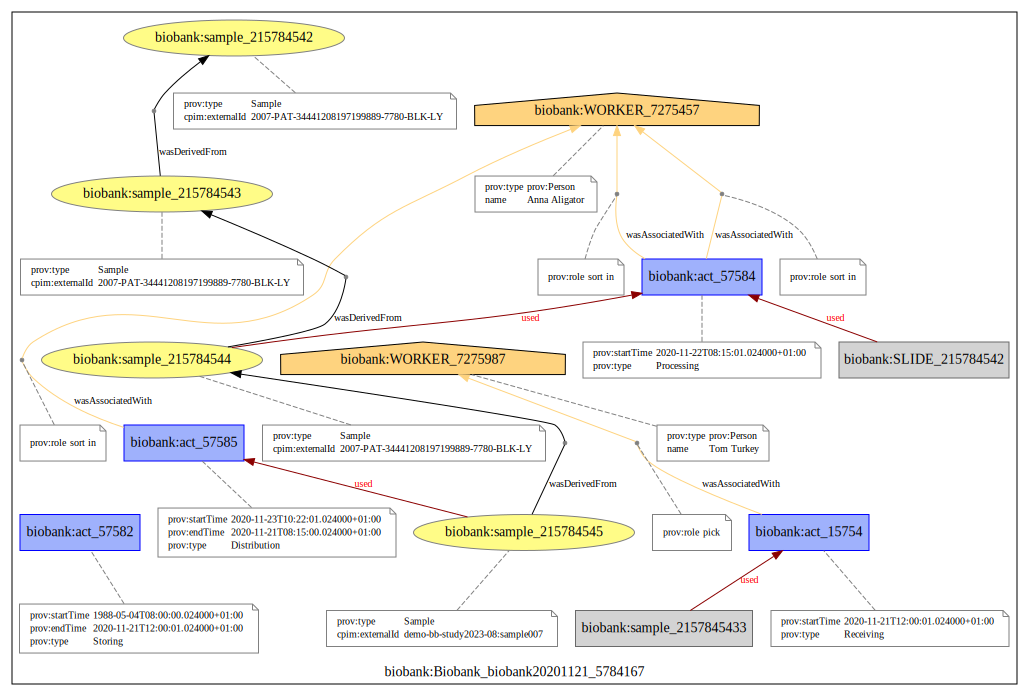

In [3]:
#Show SVG
dotrep =   prov_to_dot(document)
svg_content = dotrep.create(format="svg", encoding="utf-8")
SVG(svg_content)

In [4]:
provn = document.serialize(format='provn')
print(provn)

document
  default <https://github.com/BBMRI-ERIC/ISO23494-PROV-demonstrator/tree/main/https://github.com/BBMRI-ERIC/ISO23494-PROV-demonstrator/tree/main/Part%203%20-%20Provenance%20of%20Biological%20Specimen/examples-2023/biobank_2020-11-21_5784167>
  prefix cpim <http://cpim.org/>
  prefix biobank <http://demo-biobank.org/>
  prefix hospital <http://demo-hospital.org/>
  
  bundle biobank:Biobank_biobank20201121_5784167
    agent(biobank:WORKER_7275457, [prov:type="prov:Person", name="Anna Aligator"])
    agent(biobank:WORKER_7275987, [prov:type="prov:Person", name="Tom Turkey"])
    entity(biobank:sample_215784545, [prov:type="Sample", cpim:externalId="demo-bb-study2023-08:sample007"])
    activity(biobank:act_57585, 2020-11-23T10:22:01.024000+01:00, 2020-11-21T08:15:00.024000+01:00, [prov:type="Distribution"])
    wasAssociatedWith(biobank:act_57585, biobank:WORKER_7275457, -, [prov:role="sort in"])
    used(biobank:sample_215784545, biobank:act_57585, -)
    entity(biobank:sample_